Importing Liabrary

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Data ...

In [108]:
data = pd.read_csv("final_test.csv") 

In [109]:
data.head() 

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


Data Refining

In [110]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [111]:
data.isnull().sum() 

weight      0
age       257
height    330
size        0
dtype: int64

In [112]:
data.dropna(inplace=True) 

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119153 non-null  int64  
 1   age     119153 non-null  float64
 2   height  119153 non-null  float64
 3   size    119153 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.5+ MB


One 🎇hot encoding

In [114]:
data['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

In [115]:
encoding = { 'XXS': 0, 'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5, 'XXXL': 6}
data['size'] = data['size'].map(encoding)
data.head() 

,weight,age,height,size
0,62,28.0,172.72,4
1,59,36.0,167.64,3
2,61,34.0,165.10,2
3,65,27.0,175.26,3
4,62,45.0,172.72,2


checking for outliers

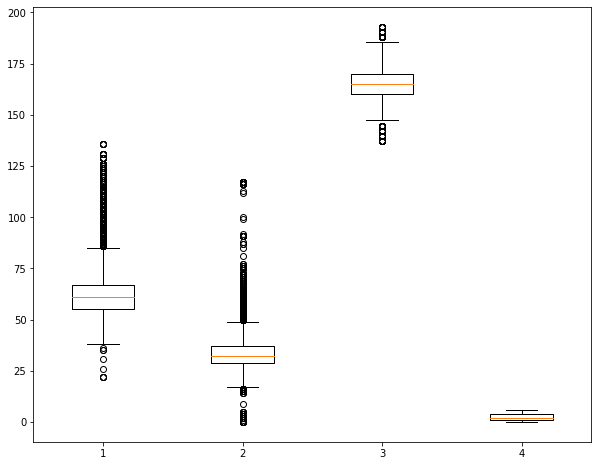

In [116]:
plt.figure(figsize=(10,8))
plt.boxplot(data)
plt.show()

Remove Outliers

In [117]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = (q3-q1)*(1.5)

In [118]:
data = data[~((data<(q1-iqr))|(data>(q3+iqr))).any(axis=1)]

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109063 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  109063 non-null  int64  
 1   age     109063 non-null  float64
 2   height  109063 non-null  float64
 3   size    109063 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 4.2 MB


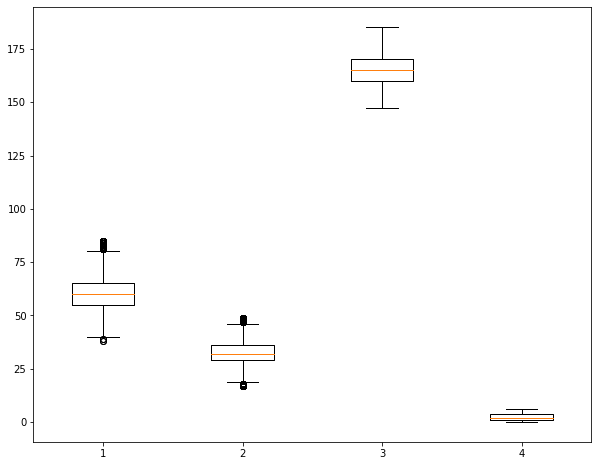

In [120]:
plt.figure(figsize=(10,8))
plt.boxplot(data)
plt.show()

Data Exploration

<AxesSubplot:>

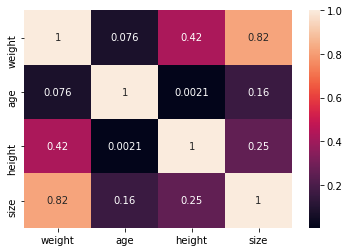

In [121]:
sns.heatmap(data[['weight','age','height','size']].corr(), annot=True ) 

In [122]:
x = data.drop('size',axis=1)
y = data['size'] 

In [123]:
y = np.array(y) 

In [124]:
x.head() 

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72


Normalize 

In [125]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x = s.fit_transform(x) 

In [126]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1) 

In [127]:
xtest.shape

(10907, 3)

Setting Algo

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

creating model setup

In [183]:
rfs = RandomForestClassifier(n_estimators=1000)
dts = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=100)
lgs = LogisticRegression() 

In [184]:
rfs.fit(xtrain,ytrain)
dts.fit(xtrain,ytrain)
knn.fit(xtrain,ytrain)
lgs.fit(xtrain,ytrain)  

LogisticRegression()

In [185]:
rfsp = rfs.predict(xtest)
dtsp = dts.predict(xtest)
knnp = knn.predict(xtest)
lgsp = lgs.predict(xtest)  

In [186]:
from sklearn.metrics import accuracy_score
rfsacc = accuracy_score(ytest, rfsp)
dtsacc = accuracy_score(ytest, dtsp)
knnacc = accuracy_score(ytest, knnp)
lgsacc = accuracy_score(ytest, lgsp) 

In [187]:
print("Model         : ","Accuracy")  
print("Random Forest : ",round(rfsacc*100,2),"%")  
print("Decision Tree : ",round(dtsacc*100,2),"%")   
print("K Neigbours   : ",round(knnacc*100,2),"%")   
print("logistic Reg  : ",round(lgsacc*100,2),"%")   

Model         :  Accuracy
Random Forest :  47.83 %
Decision Tree :  49.56 %
K Neigbours   :  49.71 %
logistic Reg  :  49.89 %


In [188]:
trial =  np.array([67,20,180])
label = { 0:'XXS', 1:'S', 2:'M', 3:'L', 4:'XL', 5:'XXL', 6:'XXXL'}
ans = rfs.predict(trial.reshape(1,3))
ans[0] 

6